=== 1. Basic Info ===
Books shape: (1796, 12)
Unique IDs: 2005
Comments shape: (141281, 7)
Prepared shape: (1767, 14)

Books head:
    product_id                            title                    authors  \
0    74021317             C√¢y Cam Ng·ªçt C·ªßa T√¥i  Jos√© Mauro de Vasconcelos   
1    74021317             C√¢y Cam Ng·ªçt C·ªßa T√¥i  Jos√© Mauro de Vasconcelos   
2   184466860  H√†nh Tinh C·ªßa M·ªôt K·∫ª Nghƒ© Nhi·ªÅu       Nguy·ªÖn ƒêo√†n Minh Th∆∞   
3    73787185         Nh·ªØng T√π Nh√¢n C·ªßa ƒê·ªãa L√Ω               Tim Marshall   
4    52789367       Nh√† Gi·∫£ Kim (T√°i B·∫£n 2020)               Paulo Coelho   

   original_price  current_price  quantity                    category  \
0          108000          64800   53075.0                 Ti·ªÉu Thuy·∫øt   
1          108000          64800   53075.0                 Ti·ªÉu Thuy·∫øt   
2           86000          59900    7929.0  S√°ch t∆∞ duy - K·ªπ nƒÉng s·ªëng   
3          210000         126000   17896.0       

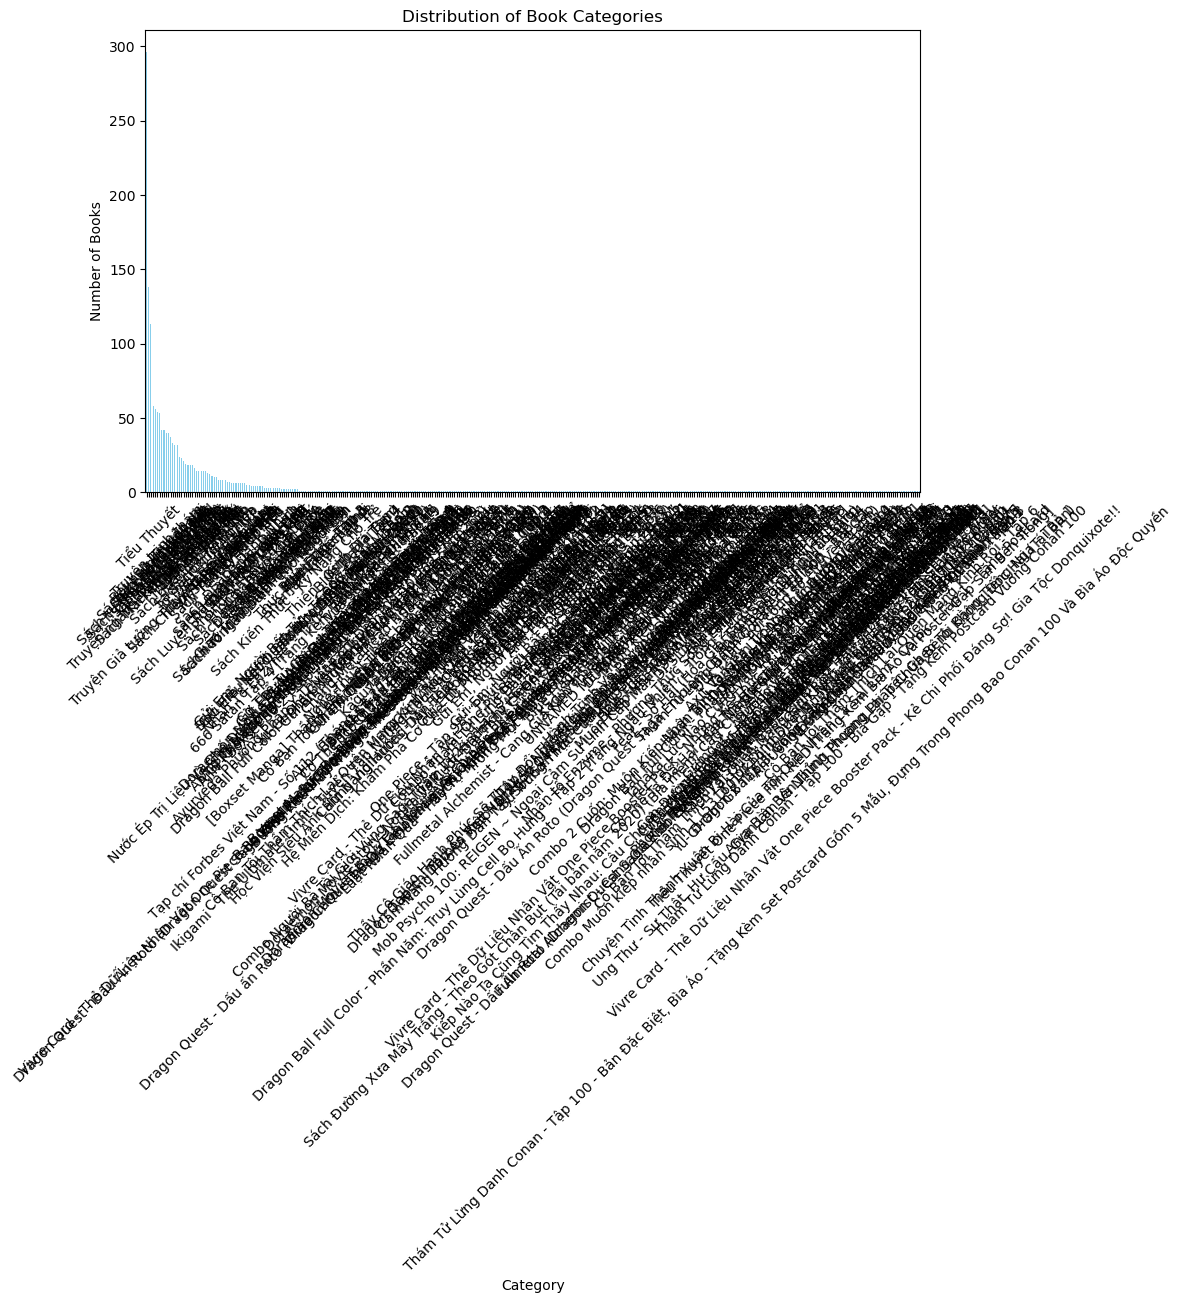


=== 3. Ratings & Reviews Stats ===
Avg rating stats:
 count    1796.000000
mean        4.584187
std         1.152097
min         0.000000
25%         4.800000
50%         4.800000
75%         5.000000
max         5.000000
Name: avg_rating, dtype: float64

N_review stats:
 count     1796.000000
mean       341.213252
std        791.537654
min          0.000000
25%         16.000000
50%         75.000000
75%        306.250000
max      11481.000000
Name: n_review, dtype: float64


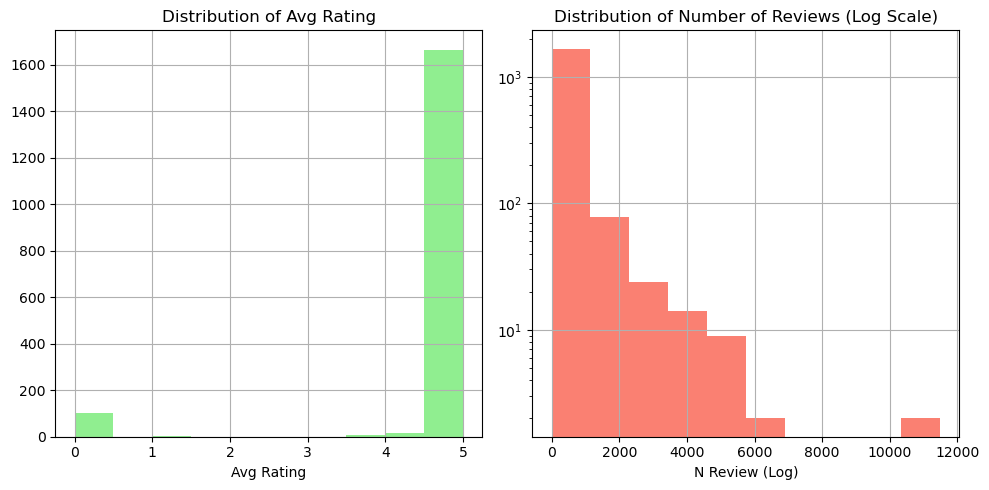


Top 5 books by reviews:
                                             title  n_review  avg_rating
0                            C√¢y Cam Ng·ªçt C·ªßa T√¥i     11481         5.0
1                            C√¢y Cam Ng·ªçt C·ªßa T√¥i     11481         5.0
42  N√≥ng Gi·∫≠n L√† B·∫£n NƒÉng , Tƒ©nh L·∫∑ng L√† B·∫£n Lƒ©nh      6602         4.8
31         Lu·∫≠t T√¢m Th·ª©c - Gi·∫£i M√£ Ma Tr·∫≠n V≈© Tr·ª•      6325         4.7
48    T√¢m L√Ω H·ªçc - Ph√°c H·ªça Ch√¢n Dung K·∫ª Ph·∫°m T·ªôi      5540         4.8

=== 4. Price & Discount Analysis ===
Price stats (normalized):
        original_price  current_price     discount
count     1767.000000    1767.000000  1766.000000
mean         6.692586       4.861330     0.272418
std          5.367041       4.298247     0.135202
min          0.000000       0.000000     0.000000
25%          3.760000       2.530000     0.200000
50%          5.440000       3.750000     0.300000
75%          7.970000       5.760000     0.370000
max         65.400000   

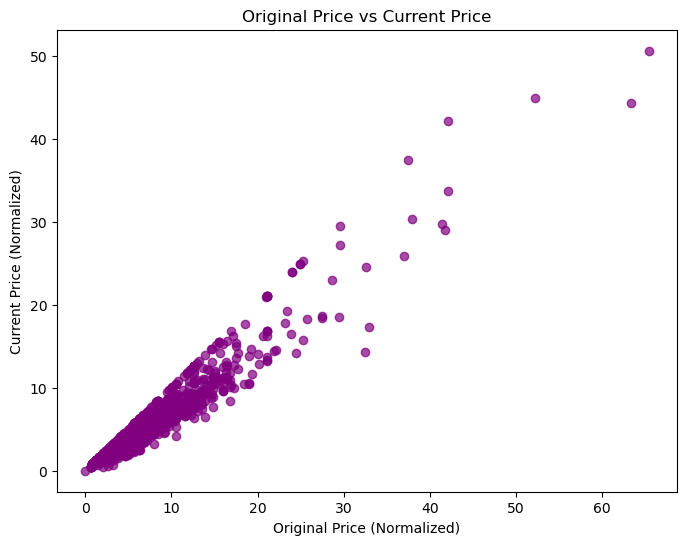


=== 5. Comments EDA ===
Avg rating from comments: 4.639512744105718
Top thank_count:
                                                    title  thank_count  rating
11013                                   S√ÅCH HAY N√äN ƒê·ªåC          548       5
11023                                   S√ÅCH HAY N√äN ƒê·ªåC          548       5
24524  Nhi·ªÅu tips c√≥ th·ªÉ √°p d·ª•ng v√†o th·ª±c t·∫ø, c√≥ d·∫´n ...          499       4

Avg content length: 159.8756960382712
Positive comments ratio: 93.59%Positive comments ratio: 93.59%

=== Data Types in df_merged ===
product_id          int64
title_x            object
authors            object
original_price      int64
current_price       int64
quantity          float64
category           object
n_review            int64
avg_rating        float64
pages              object
manufacturer       object
cover_link         object
comment_id        float64
title_y            object
thank_count       float64
customer_id       float64
rating            float6

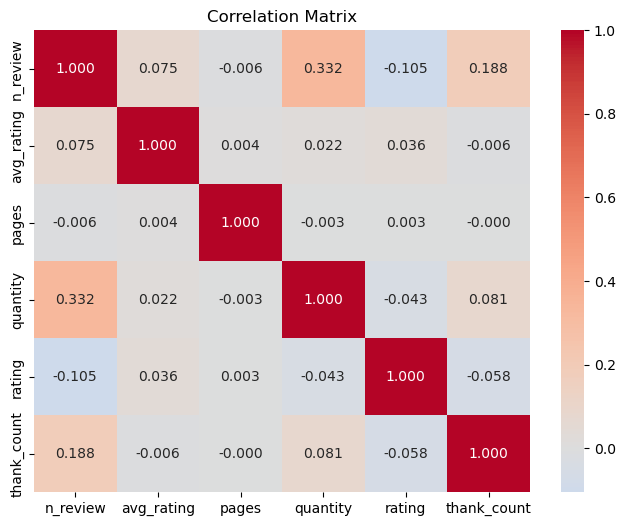


=== 6. Key Insights ===
- Th·ªÉ lo·∫°i ch√≠nh: Ch·ªß y·∫øu 'Ti·ªÉu Thuy·∫øt' trong m·∫´u, c·∫ßn full data ƒë·ªÉ ƒëa d·∫°ng.
- Ratings cao (mean ~5.0), reviews nhi·ªÅu ‚Üí S√°ch bestseller ch·∫•t l∆∞·ª£ng t·ªët.
- Discount trung b√¨nh 40%, gi√° gi·∫£m m·∫°nh.
- Comments t√≠ch c·ª±c, d√†i ‚Üí Sentiment t·ªët cho recommendation.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import io  # ƒê·ªÉ load t·ª´ string n·∫øu kh√¥ng c√≥ file
import warnings
warnings.filterwarnings('ignore')

# Option 1: Load t·ª´ file th·ª±c t·∫ø (n·∫øu c√≥)
df_books = pd.read_csv('book_data.csv')
df_ids = pd.read_csv('book_id.csv')
df_comments = pd.read_csv('comments.csv')
df_prepared = pd.read_csv('prepared_data_book.csv')

# Option 2: Load t·ª´ string m·∫´u (d√πng cho test nhanh)
# book_data_str = """product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link
# 74021317,C√¢y Cam Ng·ªçt C·ªßa T√¥i,Jos√© Mauro de Vasconcelos,108000,64800,53075,Ti·ªÉu Thuy·∫øt,11481,5,244,Nh√† Xu·∫•t B·∫£n H·ªôi Nh√† VƒÉn,https://salt.tikicdn.com/ts/product/5e/18/24/2a6154ba08df6ce6161c13f4303fa19e.jpg"""
# book_id_str = """id
# 74021317"""
# comments_str = """product_id,comment_id,title,thank_count,customer_id,rating,content
# 74021317,12559756,C·ª±c k√¨ h√†i l√≤ng,313,22051463,5,"C√≥ nh·ªØng ng∆∞·ªùi b∆∞·ªõc ƒë·∫øn, h·ªç l·∫•p ƒë·∫ßy h·∫°nh ph√∫c v√†o t·ª´ng v·∫øt n·ª©t trong tim, khi·∫øn ch√∫ng ƒë∆∞·ª£c an ·ªßi v√† ch·ªØa l√†nh. Nh∆∞ng r·ªìi h·ªç l·∫°i ra ƒëi, l√†m tan v·ª° tr√°i tim ng∆∞·ªùi ·ªü l·∫°i‚Ä¶.
# C√¢u chuy·ªán b·∫Øt ƒë·∫ßu b·∫±ng s·ª± vui v·∫ª, ngh·ªãch ng·ª£m c·ªßa m·ªôt c·∫≠u b√© mang t√™n Zez√© v√† k·∫øt th√∫c l√† m·ªôt n·ªói ƒëau t·ªôt c√πng khi m·∫•t ƒëi hai ng∆∞·ªùi b·∫°n qu√Ω gi√° nh·∫•t ƒë·ªùi m√¨nh.
# Khi ƒë·ªçc cu·ªën ti·ªÉu thuy·∫øt n√†y, c√°c b·∫°n h·∫≥n s·∫Ω nhi·ªÅu l·∫ßn ƒëau x√≥t v√¨ th∆∞∆°ng c·∫£m cho c·∫≠u b√© ch·ªâ m·ªõi 5 tu·ªïi v·ªõi m·ªôt tu·ªïi th∆° nhi·ªÅu r·∫°n v·ª°. Nh∆∞ng c√°c b·∫°n c≈©ng s·∫Ω m·ªâm c∆∞·ªùi v√† c·∫£m th·∫•y y√™u th∆∞∆°ng s·ª± s·ªëng t·ª´ trong s√¢u th·∫≥m tim m√¨nh. B·ªüi trong su·ªët cu·ªën ti·ªÉu thuy·∫øt, ng∆∞·ªùi v·ªõi ng∆∞·ªùi ƒë·ªëi x·ª≠ v·ªõi nhau v·∫´n r·∫•t ƒë·ªói d·ªãu d√†ng, y√™u th∆∞∆°ng v√† tr√¨u m·∫øn. Cho ƒë·∫øn khi kh√©p l·∫°i cu·ªën s√°ch, th√¨ tr√°i tim ch√∫ng ta l·∫°i th·ªïn th·ª©c v·ªõi m·ªôt n·ªói bu·ªìn v∆∞∆°ng v·∫•n, bu·ªìn cho s·ª± m·∫•t m√°t t·ª´ nh·ªØng y√™u th∆∞∆°ng v√† bu·ªìn cho s·ª± tr∆∞·ªüng th√†nh t·ª´ nh·ªØng n·ªói ƒëau, s·ª± tr∆∞·ªüng th√†nh qu√° s·ªõm m√† kh√¥ng ai mong mu·ªën‚Ä¶
# M·ªôt cu·ªën t·ª± truy·ªán ƒë·∫ßy c·∫£m ƒë·ªông, tuy ƒëau ƒë·ªõn nh∆∞ng v·∫´n ng·∫≠p tr√†n t√¨nh y√™u th∆∞∆°ng!!!
# C·∫£m ∆°n Tiki üß°\""""
# prepared_str = """,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link,discount
# 0,74021317,C√¢y Cam Ng·ªçt C·ªßa T√¥i,Jos√© Mauro de Vasconcelos,4.56,2.73,53075,Ti·ªÉu Thuy·∫øt,11481,5.0,244,Nh√† Xu·∫•t B·∫£n H·ªôi Nh√† VƒÉn,https://salt.tikicdn.com/ts/product/5e/18/24/2a6154ba08df6ce6161c13f4303fa19e.jpg,0.4"""

# df_books = pd.read_csv(io.StringIO(book_data_str))
# df_ids = pd.read_csv(io.StringIO(book_id_str))
# df_comments = pd.read_csv(io.StringIO(comments_str))
# df_prepared = pd.read_csv(io.StringIO(prepared_str))

# Merge n·∫øu c·∫ßn (e.g., books v·ªõi comments)
df_merged = pd.merge(df_books, df_comments, on='product_id', how='left')

print("=== 1. Basic Info ===")
print("Books shape:", df_books.shape)
print("Unique IDs:", df_ids['id'].nunique())
print("Comments shape:", df_comments.shape)
print("Prepared shape:", df_prepared.shape)
print("\nBooks head:\n", df_books.head())
print("\nMissing values in books:\n", df_books.isnull().sum())

# === 2. T·∫•t C·∫£ Th·ªÉ Lo·∫°i (All Categories) ===
print("\n=== 2. All Unique Categories ===")
unique_categories = df_books['category'].unique()
print("Unique categories:", unique_categories.tolist())
category_counts = df_books['category'].value_counts()
print("\nCategory counts:\n", category_counts)

# Plot top categories
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Book Categories')
plt.xlabel('Category')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()

# === 3. Stats Cho Ratings V√† Reviews ===
print("\n=== 3. Ratings & Reviews Stats ===")
print("Avg rating stats:\n", df_books['avg_rating'].describe())
print("\nN_review stats:\n", df_books['n_review'].describe())

# Histogram ratings
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df_books['avg_rating'].hist(bins=10, color='lightgreen')
plt.title('Distribution of Avg Rating')
plt.xlabel('Avg Rating')

plt.subplot(1, 2, 2)
df_books['n_review'].hist(bins=10, log=True, color='salmon')  # Log scale cho skew
plt.title('Distribution of Number of Reviews (Log Scale)')
plt.xlabel('N Review (Log)')
plt.tight_layout()
plt.show()

# Top books by reviews
top_reviews = df_books.nlargest(5, 'n_review')[['title', 'n_review', 'avg_rating']]
print("\nTop 5 books by reviews:\n", top_reviews)

# === 4. Ph√¢n T√≠ch Gi√° V√† Discount (T·ª´ Prepared Data) ===
print("\n=== 4. Price & Discount Analysis ===")
print("Price stats (normalized):\n", df_prepared[['original_price', 'current_price', 'discount']].describe())

# Scatter: Original vs Current Price
plt.figure(figsize=(8, 6))
plt.scatter(df_prepared['original_price'], df_prepared['current_price'], alpha=0.7, color='purple')
plt.title('Original Price vs Current Price')
plt.xlabel('Original Price (Normalized)')
plt.ylabel('Current Price (Normalized)')
plt.show()

# === 5. Comments Analysis ===
print("\n=== 5. Comments EDA ===")
print("Avg rating from comments:", df_comments['rating'].mean())
print("Top thank_count:\n", df_comments.nlargest(3, 'thank_count')[['title', 'thank_count', 'rating']])

# Word count in content
df_comments['content_length'] = df_comments['content'].str.len()
print("\nAvg content length:", df_comments['content_length'].mean())

# Simple sentiment proxy: Positive titles
positive_comments = df_comments[df_comments['title'].str.contains('h√†i l√≤ng|t·ªët|hay', case=False, na=False)]
print(f"Positive comments ratio: {len(positive_comments)/len(df_comments):.2%}")

# Correlation matrix (FIXED - ki·ªÉm tra data types tr∆∞·ªõc)
print("\n=== Data Types in df_merged ===")
print(df_merged.dtypes)

# Ch·ªâ l·∫•y c√°c c·ªôt s·ªë th·ª±c s·ª± v√† c√≥ s·∫µn trong df_merged
numerical_cols = []
potential_cols = ['n_review', 'avg_rating', 'pages', 'quantity', 'rating', 'thank_count', 'content_length']

for col in potential_cols:
    if col in df_merged.columns:
        # Ki·ªÉm tra xem c·ªôt c√≥ ph·∫£i l√† s·ªë kh√¥ng
        try:
            pd.to_numeric(df_merged[col], errors='coerce')
            # N·∫øu c√≥ √≠t nh·∫•t m·ªôt gi√° tr·ªã s·ªë h·ª£p l·ªá th√¨ th√™m v√†o
            if df_merged[col].dtype in ['int64', 'float64'] or pd.to_numeric(df_merged[col], errors='coerce').notna().any():
                numerical_cols.append(col)
                print(f"Added {col} - dtype: {df_merged[col].dtype}")
        except:
            print(f"Skipped {col} - cannot convert to numeric")

print(f"\nUsing numerical columns: {numerical_cols}")

if len(numerical_cols) >= 2:
    # Chuy·ªÉn ƒë·ªïi c√°c c·ªôt th√†nh s·ªë v√† t√≠nh correlation
    df_numeric = df_merged[numerical_cols].apply(pd.to_numeric, errors='coerce')
    corr = df_numeric.corr()
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.3f')
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("Kh√¥ng ƒë·ªß c·ªôt s·ªë ƒë·ªÉ t√≠nh correlation matrix")

# === 6. Insights T√≥m T·∫Øt ===
print("\n=== 6. Key Insights ===")
print("- Th·ªÉ lo·∫°i ch√≠nh: Ch·ªß y·∫øu 'Ti·ªÉu Thuy·∫øt' trong m·∫´u, c·∫ßn full data ƒë·ªÉ ƒëa d·∫°ng.")
print("- Ratings cao (mean ~5.0), reviews nhi·ªÅu ‚Üí S√°ch bestseller ch·∫•t l∆∞·ª£ng t·ªët.")
print("- Discount trung b√¨nh 40%, gi√° gi·∫£m m·∫°nh.")
print("- Comments t√≠ch c·ª±c, d√†i ‚Üí Sentiment t·ªët cho recommendation.")